In [1]:
import keras
import tensorflow as tf
from keras.datasets import mnist
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)


(60000, 28, 28)


##Data Processing 

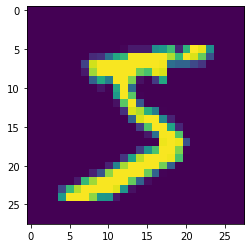

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

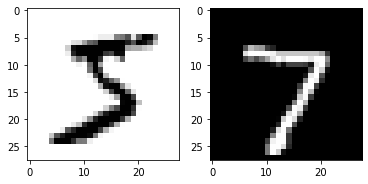

In [5]:
plt.figure(figsize = (6,5))
plt.subplot(1,2,1)
#plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.imshow(x_train[0], cmap = 'binary')

plt.subplot(122)
plt.imshow(x_test[0], cmap = 'gray')
plt.show()

In [ ]:
'outputlabel'
print(y_train[0])
print(y_test[0])

5
7


In [6]:
#normalizing data 
'''
x_train = x_train / 255
x_test = x_test / 255
'''
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

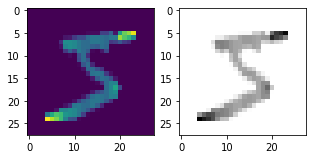

In [7]:
plt.figure(figsize=(5,8))
plt.subplot(121)
plt.imshow(x_train[0])

plt.subplot(122)
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
'''
x_train.shape[0] = 60000
'''

#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')
y_test = y_test.astype('float32')

print(x_train.shape)
print(x_test.shape)
print(x_test.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(x_train[0].shape)
print(x_train[0].ndim)

(28, 28, 1)
3


In [9]:
classes = np.unique(y_train)
n_classes = len(classes)
print(classes)
print(n_classes)

[0 1 2 3 4 5 6 7 8 9]
10


In [10]:
from keras.utils import np_utils
#Y_train = np_utils.to_categorical(y_train, number_of_classes)
#Y_test = np_utils.to_categorical(y_test, number_of_classes)

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print(y_train[0])

5


In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 4.0 MB/s 


In [ ]:
!pip install keras-layer-normalization


In [11]:
#convolution
#activation 
#pooling
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
#import BatchNormalization from tensorflow.keras.layers

#from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator


In [12]:
model = Sequential()
#model.add(tf.keras.layers.Flatten())
#model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))


model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28, 28, 1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0

In [13]:

#opt = Adam(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['Accuracy']) 

In [14]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [15]:

train_generator = gen.flow(x_train, Y_train, batch_size=64)
test_generator = test_gen.flow(x_test, Y_test, batch_size=64)

In [16]:
history = model.fit(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 59s 32ms/step - loss: 0.2223 - Accuracy: 0.9295 - val_loss: 0.0458 - val_Accuracy: 0.9863
Epoch 2/5
937/937 [==============================] - 30s 32ms/step - loss: 0.0722 - Accuracy: 0.9781 - val_loss: 0.0287 - val_Accuracy: 0.9911
Epoch 3/5
937/937 [==============================] - 31s 33ms/step - loss: 0.0517 - Accuracy: 0.9841 - val_loss: 0.0294 - val_Accuracy: 0.9906
Epoch 4/5
937/937 [==============================] - 30s 32ms/step - loss: 0.0424 - Accuracy: 0.9865 - val_loss: 0.0307 - val_Accuracy: 0.9916
Epoch 5/5
937/937 [==============================] - 30s 32ms/step - loss: 0.0388 - Accuracy: 0.9877 - val_loss: 0.0221 - val_Accuracy: 0.9928


In [ ]:
model_history = history.history
print(model_history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


In [ ]:
validation_accuracy = model_history['val_Accuracy']
model_loss = model_history['loss']
validation_loss = model_history['val_loss']
model_accuracy = model_history['Accuracy']
epochs = range(len(model_accuracy))

print(len(model_accuracy))


5


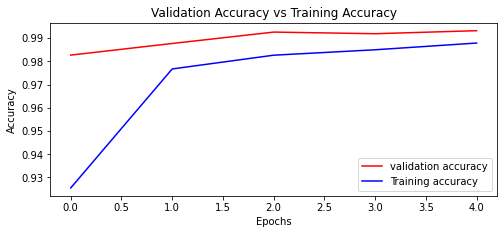

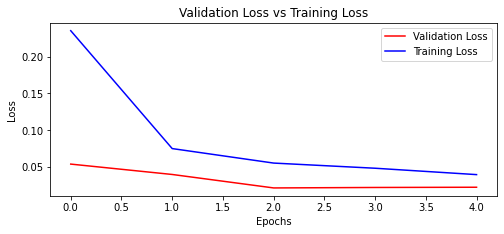

In [ ]:
# validation loss and Training loss
plt.figure(figsize=(8, 7))
plt.subplot(211)
plt.plot(epochs, validation_accuracy, 'r', label='validation accuracy')
plt.plot(epochs, model_accuracy, 'b', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Training Accuracy')
plt.legend()

#plot of validation loss and Training loss
plt.figure(figsize = (8,7))
plt.subplot(212)
plt.plot(epochs, validation_loss, 'r', label = 'Validation Loss')
plt.plot(epochs, model_loss, 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs Training Loss')
plt.legend()

plt.show()




In [ ]:
model.save('mnist.model')

INFO:tensorflow:Assets written to: mnist.model/assets


In [ ]:
new_model = tf.keras.models.load_model('mnist.model')


In [ ]:
predictions = new_model.predict(x_test)


In [ ]:
print(predictions)


[[2.2924850e-08 1.6855721e-06 1.0989095e-04 ... 9.9982929e-01
  1.8820996e-06 8.8719326e-06]
 [5.9972326e-06 5.3439417e-06 9.9996698e-01 ... 8.1187754e-06
  1.1830449e-05 8.1711356e-08]
 [1.7057205e-06 9.9960309e-01 2.4131821e-05 ... 7.5235653e-06
  1.4563561e-05 2.4145572e-06]
 ...
 [2.4329631e-12 3.6246487e-08 3.4128721e-11 ... 5.9996363e-10
  1.6630474e-07 1.4423110e-08]
 [1.8126035e-12 1.6551702e-12 2.3641393e-12 ... 2.8194287e-13
  1.6791374e-07 8.5306195e-10]
 [3.9394217e-05 2.1125030e-07 1.0632092e-05 ... 7.0730309e-08
  1.9191274e-04 1.5883252e-07]]


In [ ]:
print(np.argmax(predictions[0]))


7


In [ ]:
x_test = x_test.reshape(10000, 28, 28)

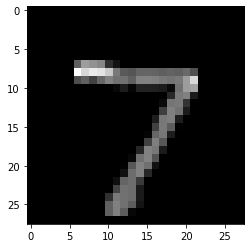

In [ ]:
plt.imshow(x_test[0], cmap=plt.cm.gray)
plt.show()